In [314]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display, Image, YouTubeVideo, HTML
%matplotlib inline 
import json
import seaborn as sns 
import requests
from ipywidgets import Image
import cStringIO

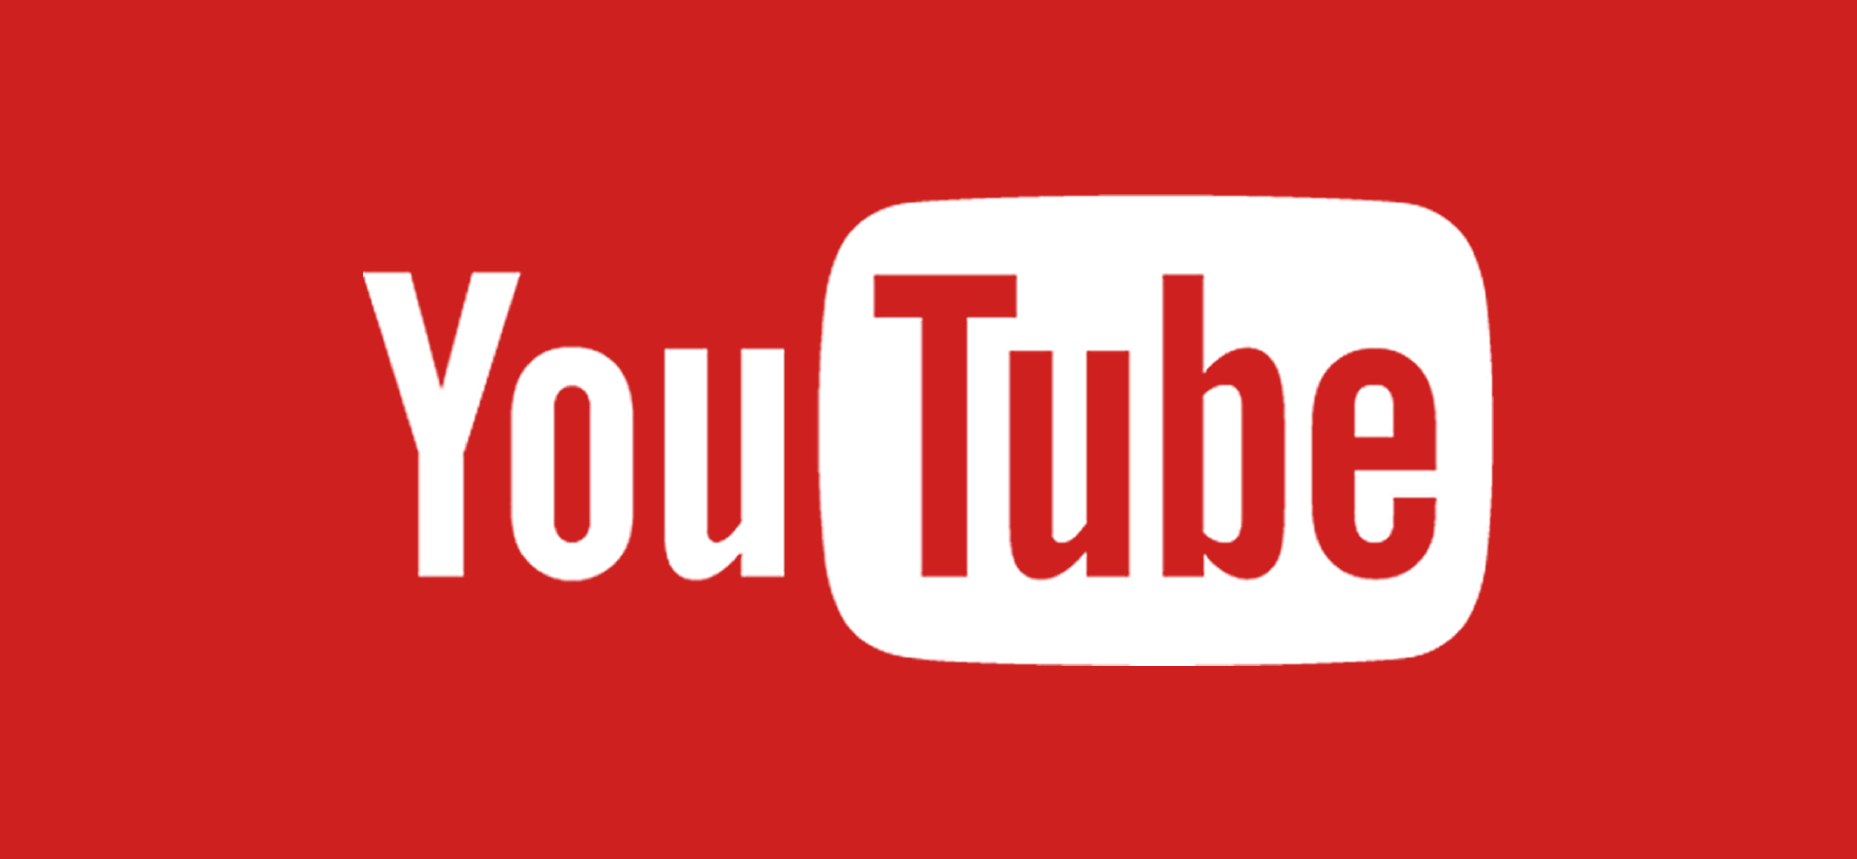

In [233]:
display(Image(filename='youtube2.png'))

# Capstone project: Youtube videos trends in US
### Data source: https://www.kaggle.com/datasnaek/youtube-new/data
### Research questions:  
#### 1. Trending in people interests: by category, views, likes, dislikes, comments, tages 
#### 2. Text analysis: titles of vides > common trends, keywords? 

In [158]:
df=pd.read_csv('data/youtube/USvideos.csv') 

In [199]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,date,year,month,day
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13 17:13:01,2017,11,2017-11-13
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2017-04-21 06:47:32,2017,4,2017-04-21
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2017-11-11 15:00:03,2017,11,2017-11-11
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,...,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,2017-11-11 18:08:04,2017,11,2017-11-11
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,...,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,2017-11-11 01:19:33,2017,11,2017-11-11


In [163]:
#df_lookup_category=pd.read_json('data/youtube/US_category_id.json', orient='records')
file = 'data/youtube/US_category_id.json'
with open(file) as train_file:
    data = json.load(train_file)

# converting json dataset from dictionary to dataframe
df_lookup = pd.DataFrame.from_dict(dict_train)
df_lookup.reset_index(level=0, inplace=True)

In [164]:
df_lookup=pd.DataFrame()

In [165]:
l1=[]
for result in data[u'items']:
    l1.append(result[u'id'])

In [166]:
l=[] 
for result in data[u'items']:
    l.append(result[u'snippet'][u'title'])

In [167]:
df_lookup['category_id']=l1

In [168]:
df_lookup['category_name']=l

In [169]:
df_lookup['category_id']=df_lookup.category_id.astype(int)

In [170]:
df_lookup.head(2) 

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles


In [171]:
df_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
category_id      32 non-null int64
category_name    32 non-null object
dtypes: int64(1), object(1)
memory usage: 584.0+ bytes


In [172]:
df=pd.merge(df, df_lookup, on=['category_id'])

In [173]:
df.head(2)  

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs


In [174]:
#EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14400 entries, 0 to 14399
Data columns (total 17 columns):
video_id                  14400 non-null object
trending_date             14400 non-null object
title                     14400 non-null object
channel_title             14400 non-null object
category_id               14400 non-null int64
publish_time              14400 non-null object
tags                      14400 non-null object
views                     14400 non-null int64
likes                     14400 non-null int64
dislikes                  14400 non-null int64
comment_count             14400 non-null int64
thumbnail_link            14400 non-null object
comments_disabled         14400 non-null bool
ratings_disabled          14400 non-null bool
video_error_or_removed    14400 non-null bool
description               14139 non-null object
category_name             14400 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 1.7+ MB


In [175]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,14400.000000,1.440000e+04,1.440000e+04,1.440000e+04,1.440000e+04
mean,20.013333,1.224748e+06,4.559116e+04,3.279715e+03,5.985172e+03
std,7.599421,4.567134e+06,1.577944e+05,4.395533e+04,3.696786e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,9.235175e+04,1.988000e+03,8.700000e+01,2.850000e+02
50%,24.000000,3.151860e+05,9.017500e+03,3.270000e+02,1.028000e+03
75%,25.000000,9.966675e+05,2.962150e+04,1.128000e+03,3.418250e+03
max,43.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06


### Most…

### viewed cateogories: 

In [237]:
#viewed videos: 
df.groupby('video_id').views.sum().nlargest(10)

video_id
FlsCjmMhFmw    780801040
6ZfuNTqbHE8    669485401
TyHvyGVs42U    534738794
l_lblj8Cq0o    328974320
WS7f5xpGYn8    267531344
dfnCAmr569k    227530899
vn9mMeWcgoM    215720479
ZJDMWVZta3M    215069746
LsoLEjrDogU    207839755
_9YMpuLDnwo    207117244
Name: views, dtype: int64

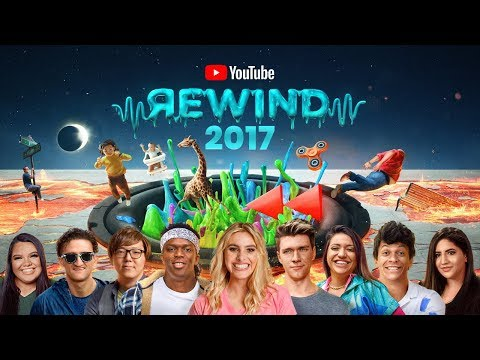

['YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
780801040


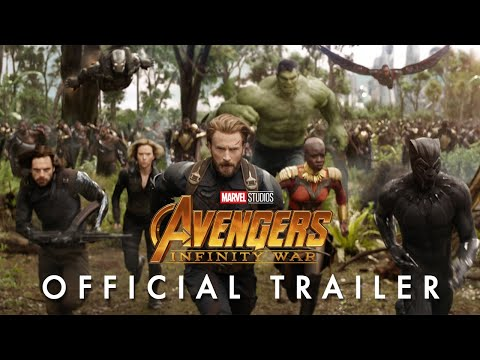

["Marvel Studios' Avengers: Infinity War Official Trailer"]
669485401


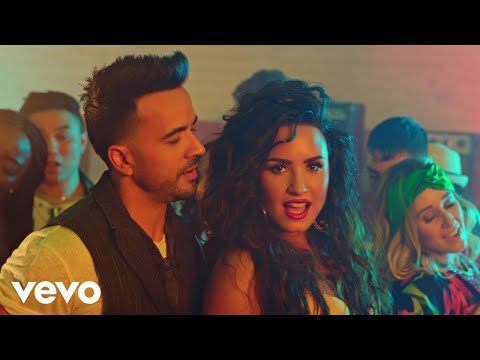

['Luis Fonsi, Demi Lovato - \xc3\x89chame La Culpa']
534738794


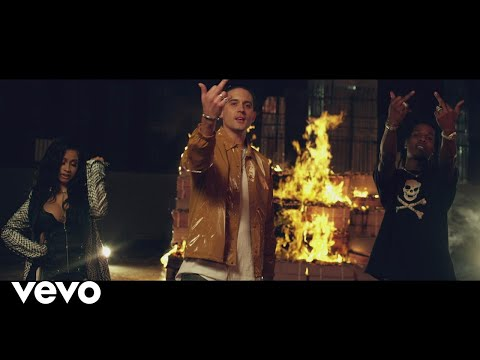

[ 'G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi B, French Montana, Juicy J, Belly']
328974320


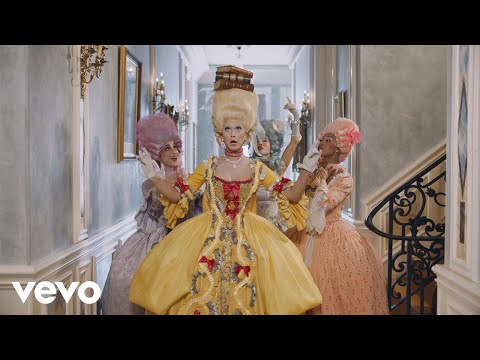

['Katy Perry - Hey Hey Hey (Official)']
267531344


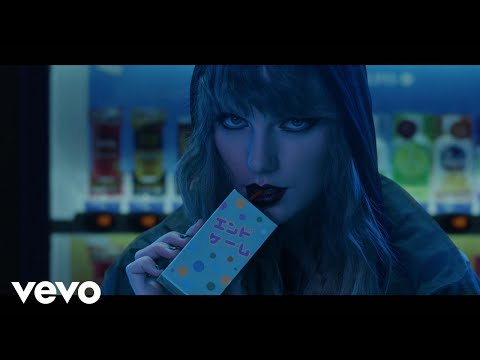

['Taylor Swift - End Game ft. Ed Sheeran, Future']
227530899


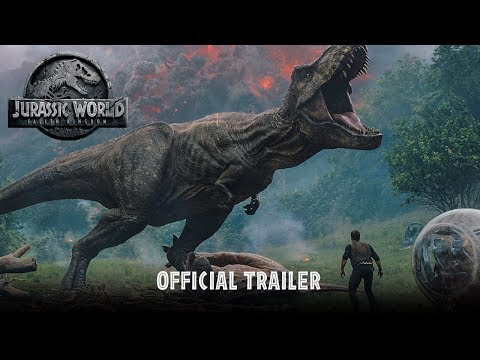

['Jurassic World: Fallen Kingdom - Official Trailer [HD]']
215720479


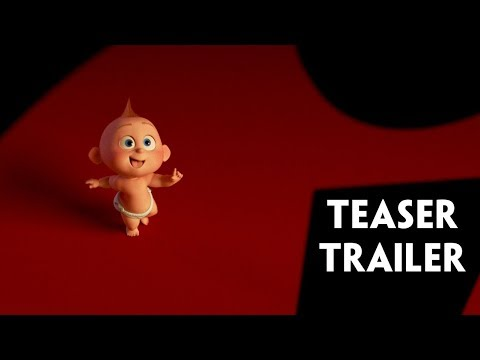

['Incredibles 2 Official Teaser Trailer']
215069746


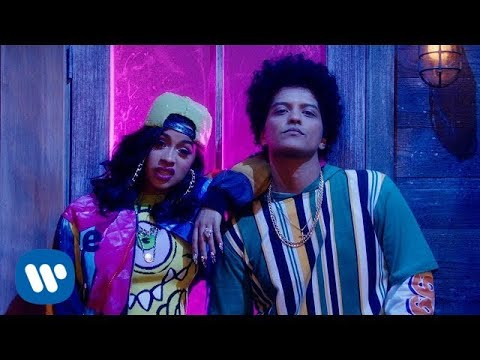

['Bruno Mars - Finesse (Remix) [Feat. Cardi B] [Official Video]']
207839755


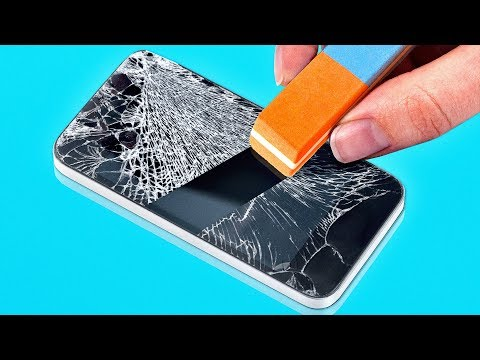

['42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE']
207117244


In [309]:
for i, row in df.groupby('video_id').views.sum().nlargest(10).reset_index().iterrows(): 
    #l3.append((Image(value=requests.get(df[df.video_id==row['video_id']]['thumbnail_link'].unique()[0]).content, width=100,  embedded=True)))
    display(YouTubeVideo(df[df.video_id==row['video_id']]['video_id'].unique()[0]))
    print  df[df.video_id==row['video_id']]['title'].unique()
    print row['views']

# data['title']=l
# data['views']=l2
# data['image']=l3

# img_buffer = cStringIO.StringIO()
# imgStr = base64.b64encode(img_buffer.getvalue())
# html_all = data.to_html(escape=False).format(imgStr)
# display(HTML(html_all))
# Youtube



### most liked videos

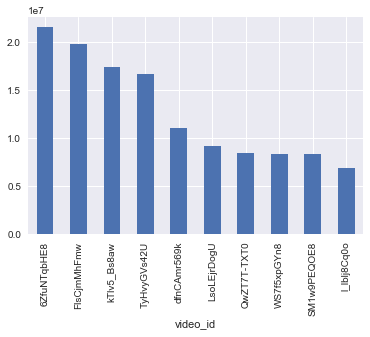

In [239]:
df.groupby('video_id').likes.sum().nlargest(10).plot('bar')

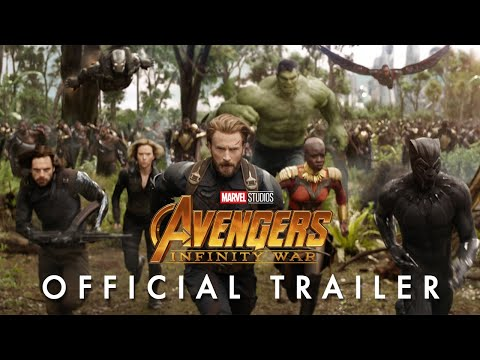

["Marvel Studios' Avengers: Infinity War Official Trailer"]
21555430


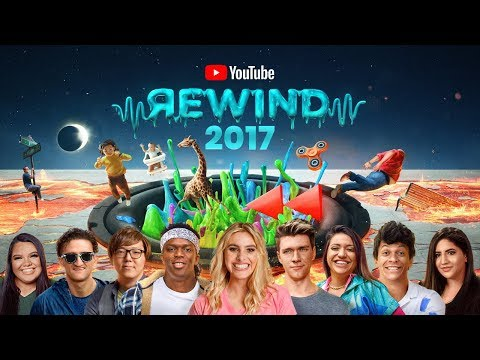

['YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
19781372


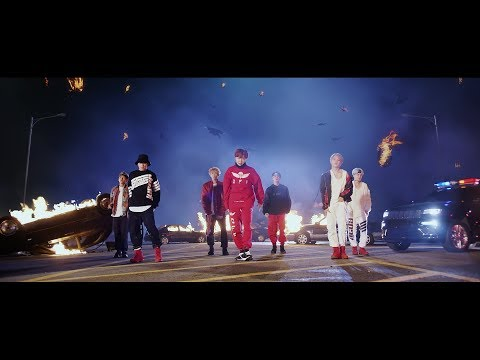

[ "BTS (\xeb\xb0\xa9\xed\x83\x84\xec\x86\x8c\xeb\x85\x84\xeb\x8b\xa8) 'MIC Drop (Steve Aoki Remix)' Official MV"]
17388770


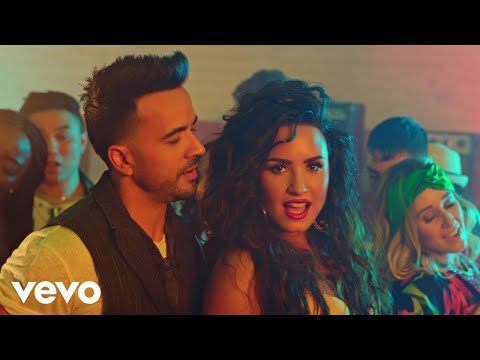

['Luis Fonsi, Demi Lovato - \xc3\x89chame La Culpa']
16671426


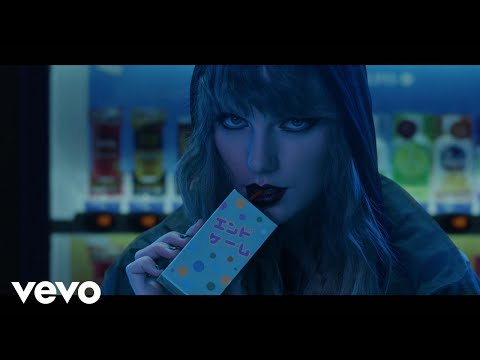

['Taylor Swift - End Game ft. Ed Sheeran, Future']
11127424


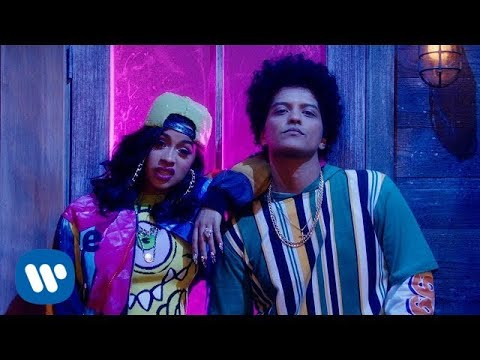

['Bruno Mars - Finesse (Remix) [Feat. Cardi B] [Official Video]']
9188754


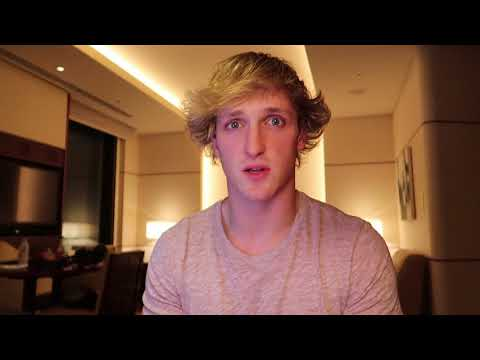

['So Sorry.']
8495733


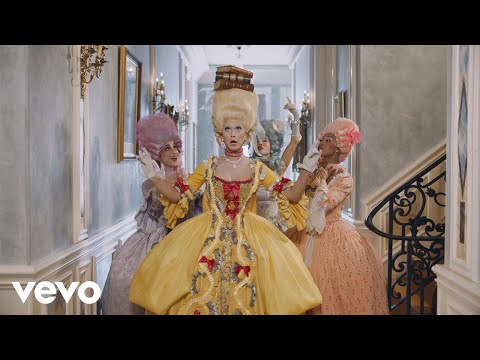

['Katy Perry - Hey Hey Hey (Official)']
8404683


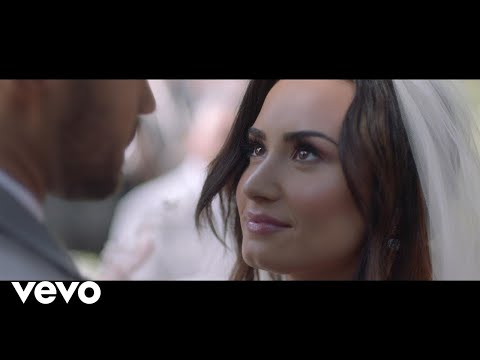

['Demi Lovato - Tell Me You Love Me']
8379638


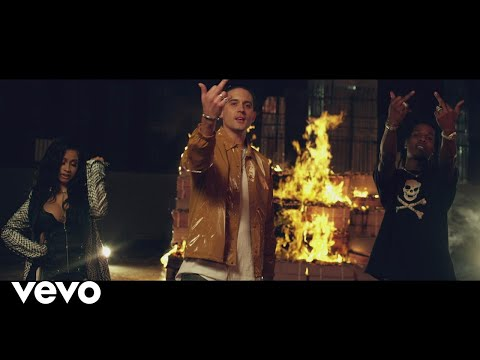

[ 'G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi B, French Montana, Juicy J, Belly']
6954217


In [311]:
for i, row in df.groupby('video_id').likes.sum().nlargest(10).reset_index().iterrows(): 
    #l3.append((Image(value=requests.get(df[df.video_id==row['video_id']]['thumbnail_link'].unique()[0]).content, width=100,  embedded=True)))
    display(YouTubeVideo(df[df.video_id==row['video_id']]['video_id'].unique()[0]))
    print  df[df.video_id==row['video_id']]['title'].unique()
    print row['likes']

### most disliked videos

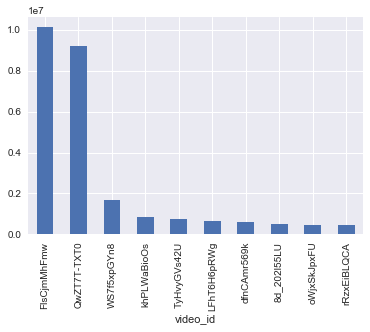

In [240]:
df.groupby('video_id').dislikes.sum().nlargest(10).plot('bar')

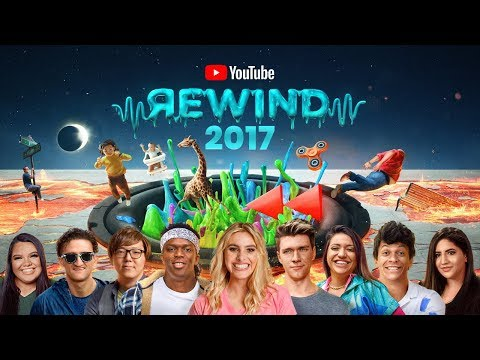

['YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
10111153


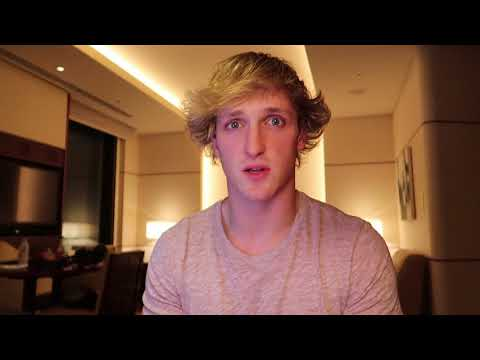

['So Sorry.']
9192539


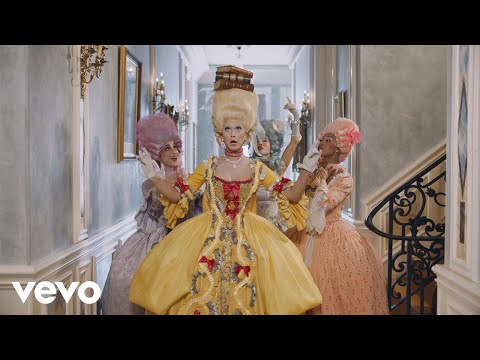

['Katy Perry - Hey Hey Hey (Official)']
1658814


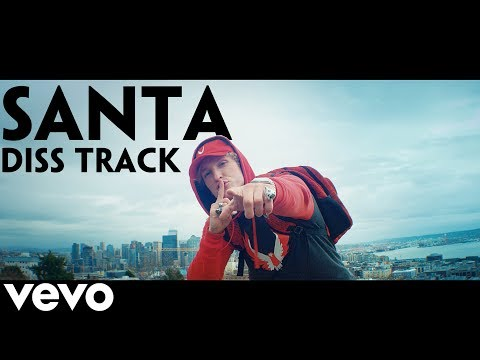

['Logan Paul - SANTA DISS TRACK (Official Music Video)']
842738


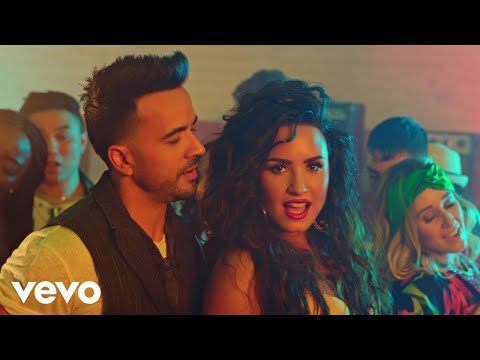

['Luis Fonsi, Demi Lovato - \xc3\x89chame La Culpa']
753037


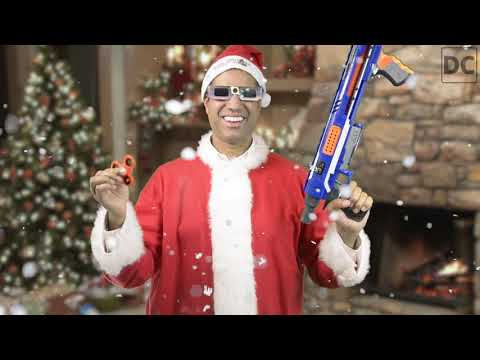

['PSA from Chairman of the FCC Ajit Pai']
671419


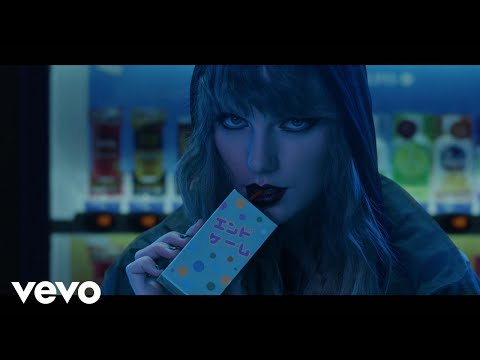

['Taylor Swift - End Game ft. Ed Sheeran, Future']
596203


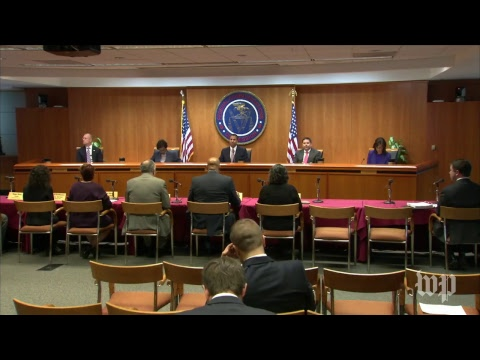

['The FCC repeals its net neutrality rules']
500631


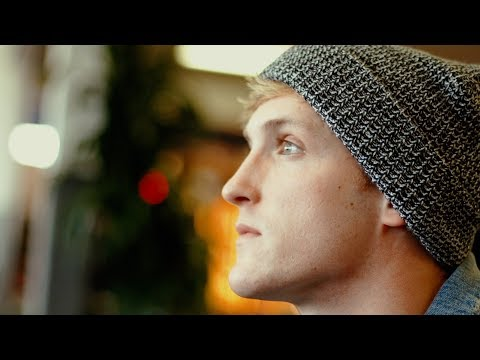

['Suicide: Be Here Tomorrow.']
482189


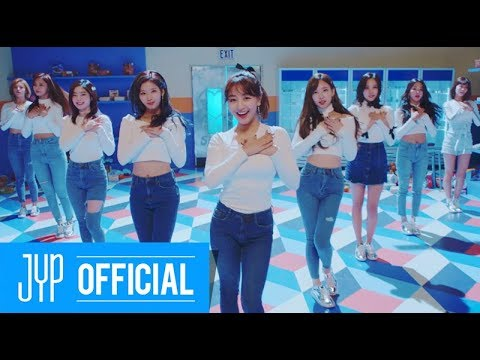

['TWICE Heart Shaker M/V']
480992


In [312]:
for i, row in df.groupby('video_id').dislikes.sum().nlargest(10).reset_index().iterrows(): 
    #l3.append((Image(value=requests.get(df[df.video_id==row['video_id']]['thumbnail_link'].unique()[0]).content, width=100,  embedded=True)))
    display(YouTubeVideo(df[df.video_id==row['video_id']]['video_id'].unique()[0]))
    print  df[df.video_id==row['video_id']]['title'].unique()
    print row['dislikes']

### most commented videos

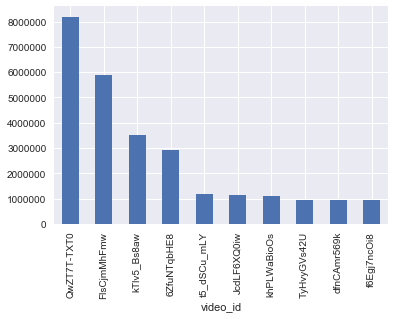

In [241]:
df.groupby('video_id').comment_count.sum().nlargest(10).plot('bar')

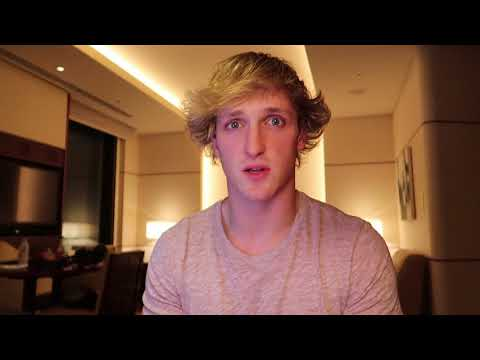

['So Sorry.']
8190045


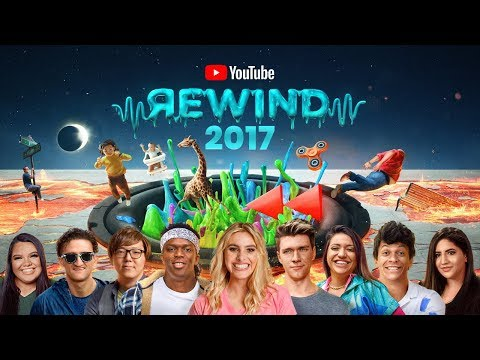

['YouTube Rewind: The Shape of 2017 | #YouTubeRewind']
5898529


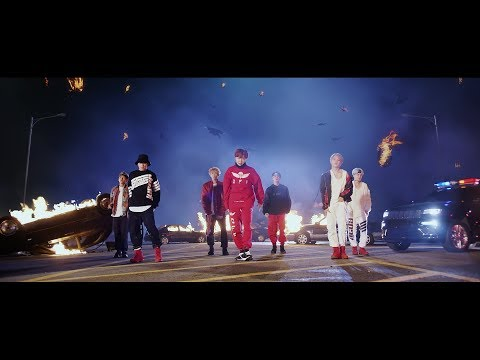

[ "BTS (\xeb\xb0\xa9\xed\x83\x84\xec\x86\x8c\xeb\x85\x84\xeb\x8b\xa8) 'MIC Drop (Steve Aoki Remix)' Official MV"]
3509630


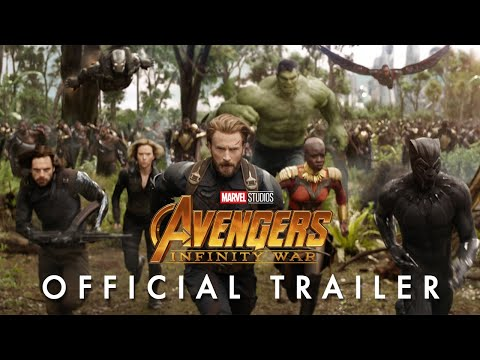

["Marvel Studios' Avengers: Infinity War Official Trailer"]
2906944


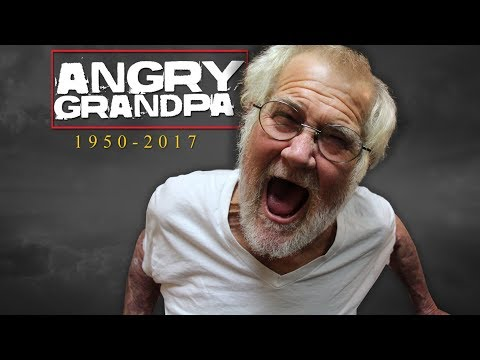

['RIP ANGRY GRANDPA']
1186950


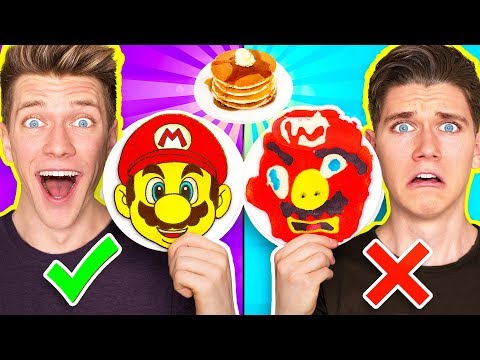

[ 'PANCAKE ART CHALLENGE 4!!! Learn How To Make Mario Odyssey Star Wars Jedi Nintendo Food DIY Pancake']
1150210


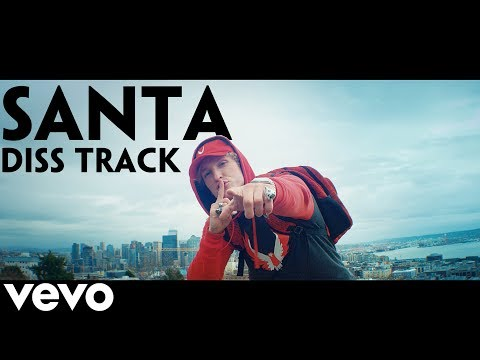

['Logan Paul - SANTA DISS TRACK (Official Music Video)']
1100755


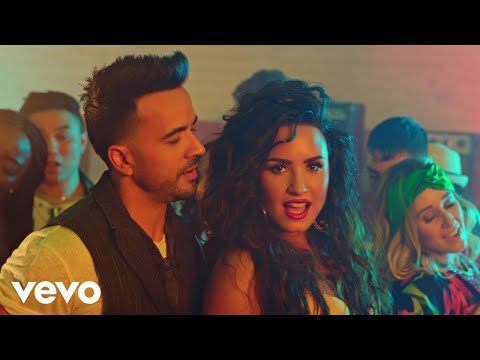

['Luis Fonsi, Demi Lovato - \xc3\x89chame La Culpa']
953427


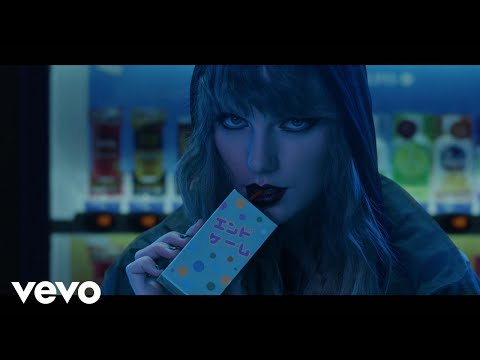

['Taylor Swift - End Game ft. Ed Sheeran, Future']
940234


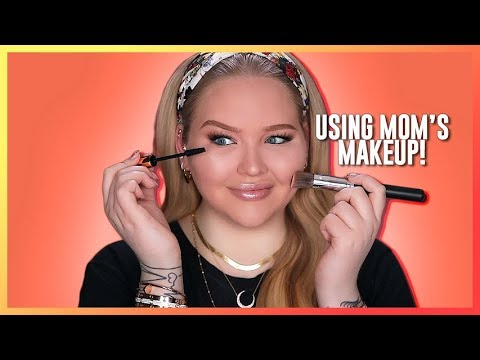

["FULL FACE USING ONLY MY MOM'S MAKEUP Challenge | NikkieTutorials"]
934481


In [313]:
for i, row in df.groupby('video_id').comment_count.sum().nlargest(10).reset_index().iterrows(): 
    #l3.append((Image(value=requests.get(df[df.video_id==row['video_id']]['thumbnail_link'].unique()[0]).content, width=100,  embedded=True)))
    display(YouTubeVideo(df[df.video_id==row['video_id']]['video_id'].unique()[0]))
    print  df[df.video_id==row['video_id']]['title'].unique()
    print row['comment_count']

### Now look at statistics by channels

In [178]:
df.groupby('channel_title').likes.sum().nlargest(10)

channel_title
ibighit                 23141028
Marvel Entertainment    21831285
YouTube Spotlight       19862478
Logan Paul Vlogs        17643357
Ed Sheeran              17115221
LuisFonsiVEVO           16671426
SMTOWN                  16225691
EminemVEVO              13130030
TaylorSwiftVEVO         12284727
Liza Koshy              11124040
Name: likes, dtype: int64

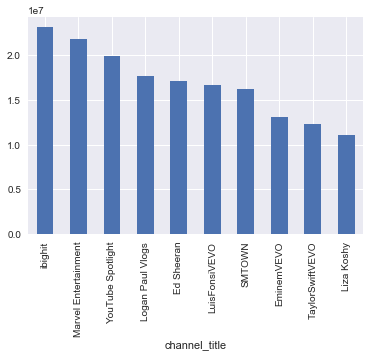

In [179]:
df.groupby('channel_title').likes.sum().nlargest(10).plot('bar')

### Now look at statistics by category 

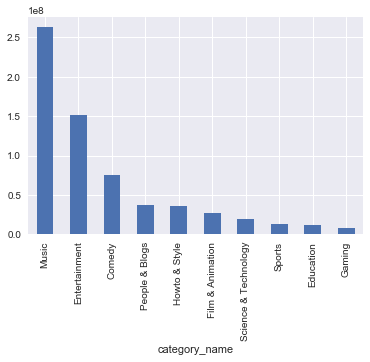

In [315]:
df.groupby('category_name').likes.sum().nlargest(10).plot('bar')

### Now channel with category

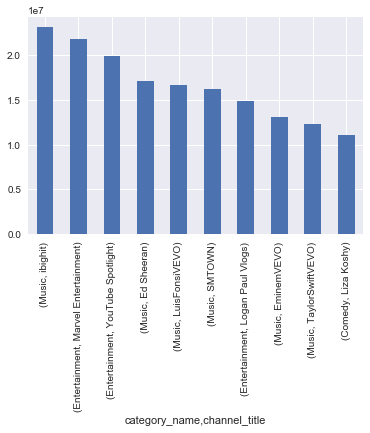

In [207]:
df.groupby(['category_name','channel_title']).likes.sum().nlargest(10).plot('bar')

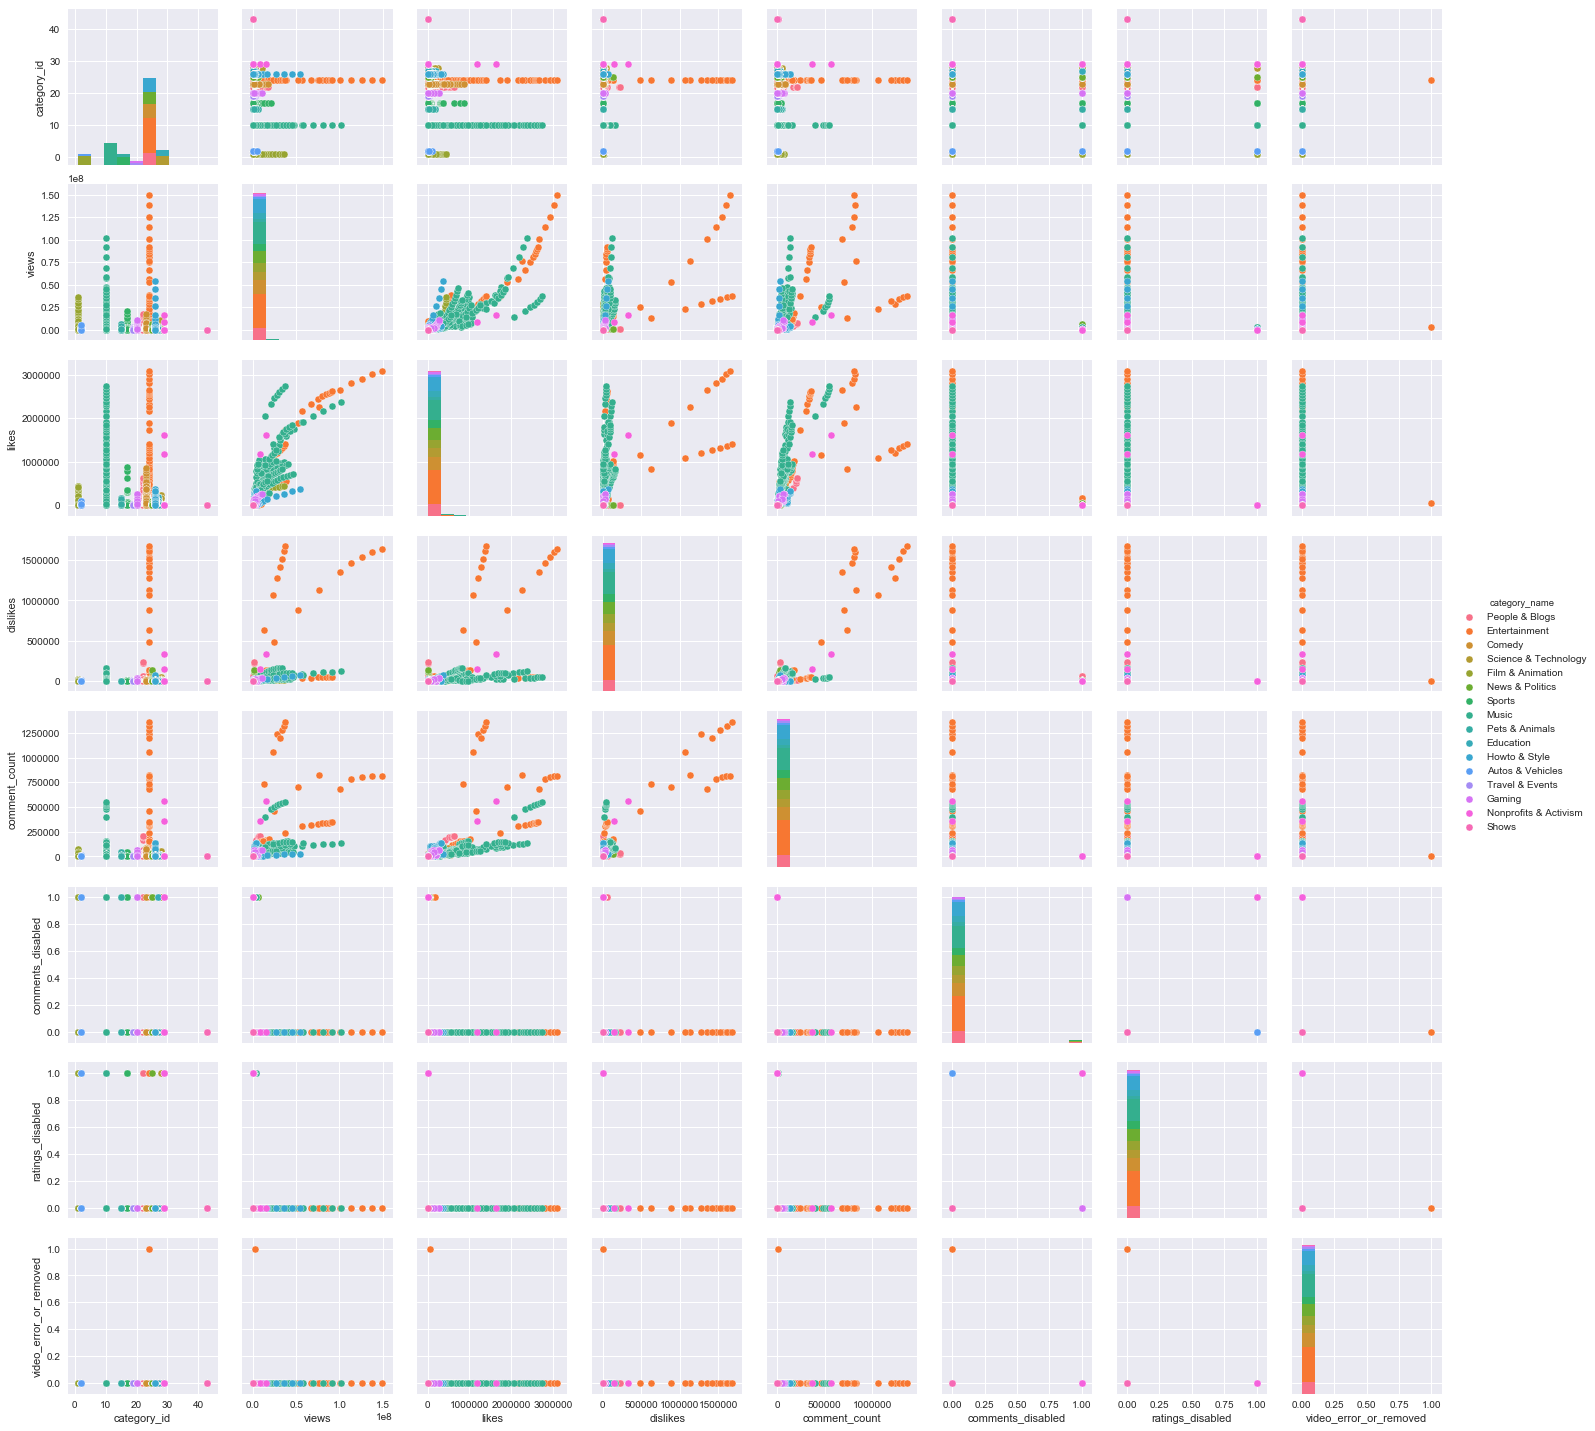

In [180]:
sns.pairplot(df, hue='category_name')

In [182]:
#time trending 
df['date']=pd.to_datetime(df.publish_time)

In [183]:
df['year']=df.date.dt.year

In [184]:
df['month']=df.date.dt.month

In [185]:
df['day']=df.date.dt.date

In [204]:
df.groupby(['year', 'month'])['views', 'likes', 'dislikes', 'comment_count'].sum() #huge jump in 2017/11 

views      likes  dislikes  comment_count
year month                                                
2016 5           49160         78        15             35
     6           84311        342       125            224
     10         233441          0         0              0
     11          87284        239         6              7
     12          18195         66         0              8
2017 2          128662       2040       356           1169
     3          101073        788        27             33
     4          527844      12178       832           2370
     5            1722         17         3              1
     6          578771       9904       216            535
     8         1082334      16667       424           1302
     9           71178       1052        30            119
     10        1281246      10401      1156           2116
     11     5570172505  206241184   6781144       23739299
     12     8127456546  293572198  24406375       36537139
2018 1      3923283146  156539923  16030687       25882603

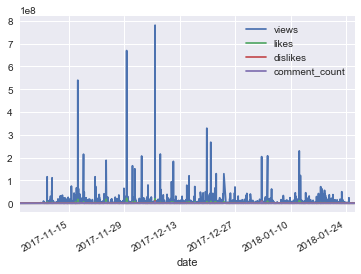

In [221]:
#daily trending since 2017/11
df[(df.year>=2017) & ((df.month>=11)| (df.month==1))].groupby(['date'])['views', 'likes', 'dislikes', 'comment_count'].sum().plot()

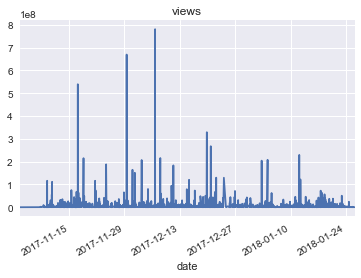

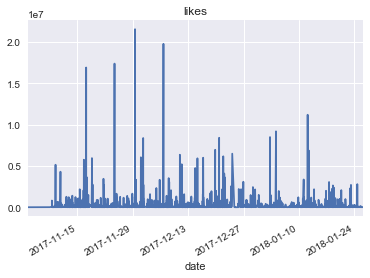

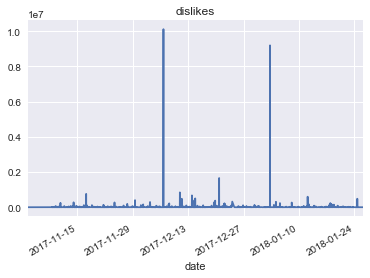

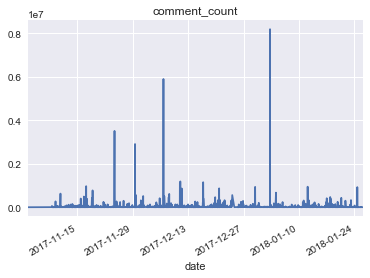

In [223]:
#daily trending since 2017/11
for i in  ['views', 'likes', 'dislikes', 'comment_count']:
    df[(df.year>=2017) & ((df.month>=11)| (df.month==1))].groupby(['date'])[i].sum().plot()
    plt.title(i)
    plt.show()

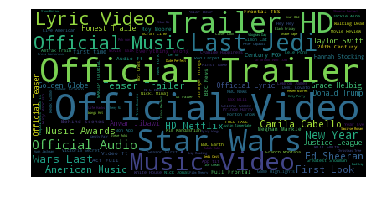

In [214]:
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud().generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

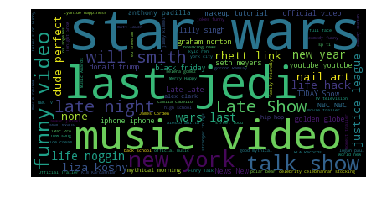

In [216]:
wordcloud = WordCloud().generate(' '.join(df['tags']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [228]:
#now let's look at what's affecting likes: 
df[['views', 'likes', 'dislikes', 'comment_count']].corr()
#definitely views and comments and suprisingly dislikes as well (more dislikes you get more likes you get!)

,views,likes,dislikes,comment_count
views,1.000000,0.879105,0.571970,0.633906
likes,0.879105,1.000000,0.479742,0.698809
dislikes,0.571970,0.479742,1.000000,0.862462
comment_count,0.633906,0.698809,0.862462,1.000000


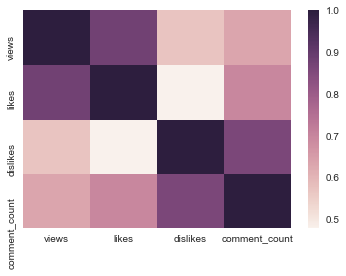

In [229]:
sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count']].corr())

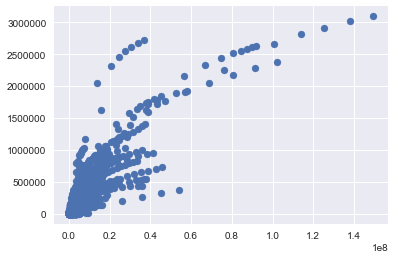

In [242]:
#Views Vs Likes
plt.scatter(df.views, df.likes)

In [257]:
def sentiment_converter(a, b):
    if a == b:
        return 'Neutral'
    elif a > b:
        return 'Positive'
    else: 
        return 'Negative'

In [260]:
#sentiment 

In [259]:
l=[] 
for i, row in df.iterrows():
    #print row['likes'], row['dislikes'] 
    l.append(sentiment_converter(row['likes'], row['dislikes']))

In [261]:
df['sentiment']=l

/Users/koyuki.nakamori/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


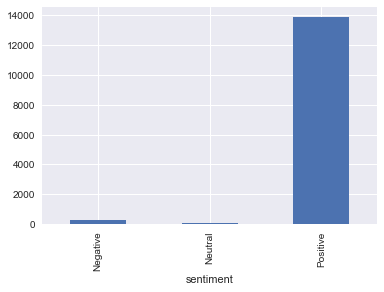

In [262]:
df.groupby('sentiment').video_id.count().plot('bar')

## Key Findings:
### 1. 
### 2.


## Next steps:
### 1. Expand analysis internationally
### 2. Since more daily data will be accumulated over time, refresh analysis after one year
### 3. Modeling: predict a video's popularity (likes) based on its attributes 

In [243]:
df.sen

Index([u'video_id', u'trending_date', u'title', u'channel_title',
       u'category_id', u'publish_time', u'tags', u'views', u'likes',
       u'dislikes', u'comment_count', u'thumbnail_link', u'comments_disabled',
       u'ratings_disabled', u'video_error_or_removed', u'description',
       u'category_name', u'date', u'year', u'month', u'day'],
      dtype='object')